In [1]:
import sys
sys.path.append('./../../')

import ikamoana.ikaseapodym as ikadym
import matplotlib.pyplot as plt

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug
from ikamoana.utils import convertToDataArray, convertToMeters

In [2]:
configuration_filepath = "./../../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [ ]:
my_sim.loadFields()

In [ ]:
# my_sim.oceanToNetCDF(to_dataset=True)

In [ ]:
diff_y_ika = convertToDataArray(my_sim.ocean.Ky)[:5]
diff_y_sea = seapodymFieldConstructor('../data/SEAPODYM_data/output/po_freeglorys_0.25x30d_1998_2019/skj_diffusion.dym')
diff_y_sea = diff_y_sea.loc[:,50.5:-39.5,119.5:289.5]
diff_y_sea = convertToMeters(diff_y_sea, timestep=30*24*60*60, square=True)

In [ ]:
diff_y_ika.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 120.0 120.2 120.5 120.8 ... 289.2 289.5 289.8 290.0

In [ ]:
diff_y_sea.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 50.5 50.25 50.0 49.75 ... -38.75 -39.0 -39.25 -39.5
  * lon      (lon) float32 119.5 119.8 120.0 120.2 ... 288.8 289.0 289.2 289.5

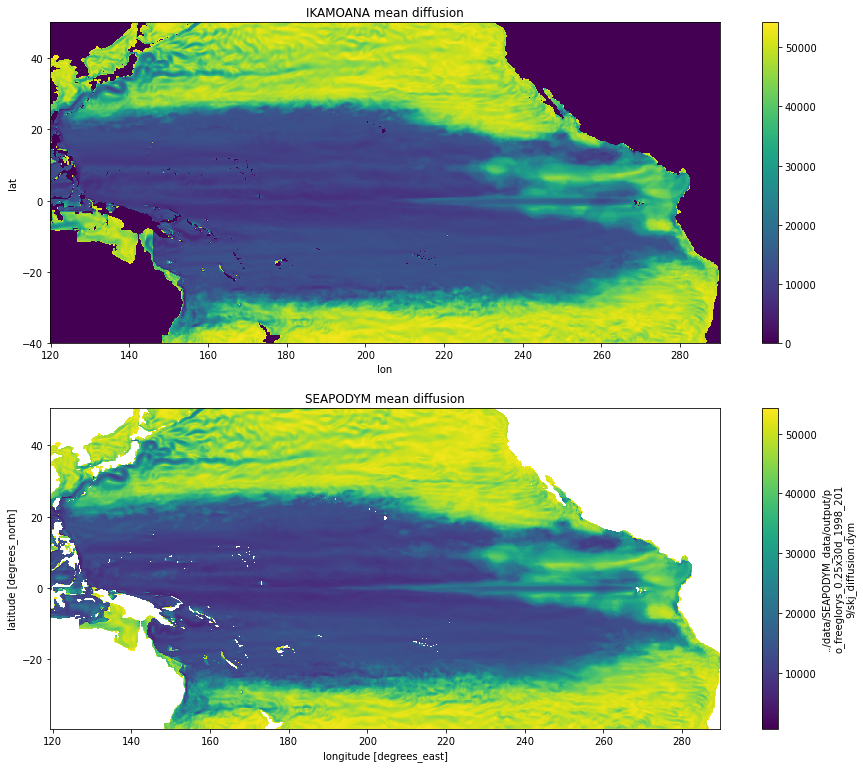

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,13))

abs(diff_y_ika).mean(axis=0).plot(ax=ax1)
abs(diff_y_sea).mean(axis=0).plot(ax=ax2)

ax1.set_title("IKAMOANA mean diffusion")
ax2.set_title("SEAPODYM mean diffusion")

plt.show()

In [ ]:
print(abs(diff_y_ika).max(axis=(1,2)))
print(abs(diff_y_sea).max(axis=(1,2)))

<xarray.DataArray (time: 5)>
array([54279.84 , 54287.3  , 54257.36 , 54294.977, 54297.53 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
<xarray.DataArray '../data/SEAPODYM_data/output/po_freeglorys_0.25x30d_1998_2019/skj_diffusion.dym' (time: 5)>
array([54320.453, 54320.453, 54320.453, 54320.453, 54320.453],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16


In [ ]:
import numpy as np
np.array([54320.453, 54320.453, 54320.453, 54320.453, 54320.453]) - np.array([54279.84 , 54287.3  , 54257.36 , 54294.977, 54297.53 ])

array([40.613, 33.153, 63.093, 25.476, 22.923])

In [ ]:
np.array([-40.613, -33.153, -63.093, -25.476, -22.923]) / np.array([54279.84 , 54287.3  , 54257.36 , 54294.977, 54297.53 ])

array([-0.00074822, -0.0006107 , -0.00116285, -0.00046921, -0.00042217])